In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

=== Reading images and mask ===

In [2]:
img = cv2.imread("blend/ILSVRC2012_test_00000250.jpg",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = cv2.imread("blend/ILSVRC2012_test_00000250.png", cv2.IMREAD_GRAYSCALE)
mask = mask.astype("uint8")

t, msk = cv2.threshold(mask, 127,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

Original image


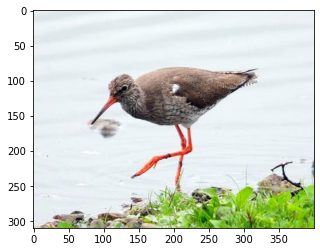

Original mask


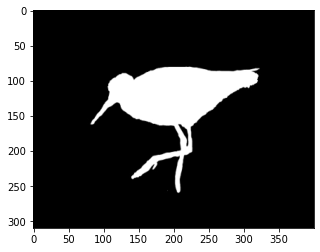

In [4]:
print('Original image')
plt.imshow(img)
plt.show()


print('Original mask')
plt.imshow(mask, cmap='gray')
plt.show()

=== Defining function to generate trimap of the corresponding mask ===

In [6]:
def generate_trimap(mask,eroision_iter=6,dilate_iter=4):
    mask[mask==1] = 255
    d_kernel = np.ones((3,3))
    erode  = cv2.erode(mask,d_kernel,iterations=eroision_iter)
    dilate = cv2.dilate(mask,d_kernel,iterations=dilate_iter)
    unknown1 = cv2.bitwise_xor(erode,mask)
    unknown2 = cv2.bitwise_xor(dilate,mask)
    unknowns = cv2.add(unknown1,unknown2)
    unknowns[unknowns==255]=127
    trimap = cv2.add(mask,unknowns)
    labels = trimap.copy()
    labels[trimap==127]=1 #unknown
    labels[trimap==255]=2 #foreground
    return labels

In [7]:
result = generate_trimap(msk)

In [13]:
print('Unique values from trimap-result:')
np.unique(result)

Unique values from trimap-result:


array([0, 1, 2], dtype=uint8)

In [17]:
result[result == 2] = 255
result[result == 1] = 127
result = result / 255
img = img.astype('float64')

Trimap of the mask:


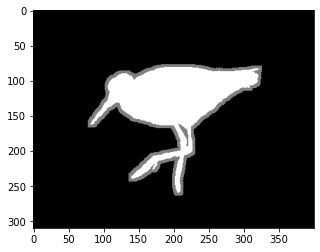

In [21]:
print('Trimap of the mask:')
plt.imshow(result, cmap='gray')
plt.show()

In [20]:
import pymatting
alpha = pymatting.estimate_alpha_cf(img,result,laplacian_kwargs={"epsilon": 1e-6},cg_kwargs={"maxiter":2000})
#alpha = pymatting.estimate_alpha_cf(img,result)

ZeroDivisionError: division by zero